In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import copy
from warnings import filterwarnings
filterwarnings("ignore")

pd.options.display.max_columns=10000
pd.options.display.max_rows=50
# pd.options.display.max_colwidth= -1 #no limit
pd.options.display.min_rows=15

In [2]:
data = pd.read_csv('heart.csv')
df=copy.deepcopy(data)
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
print(df.shape)

(303, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
print(df.sex.value_counts())

1    207
0     96
Name: sex, dtype: int64


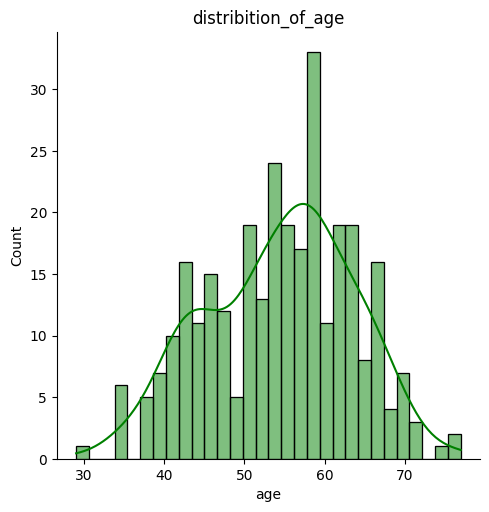

In [8]:
#distribution plot of age of the people
sns.displot(df['age'], kde=True, bins=30, color='Green')
plt.title('distribition_of_age')
plt.show()

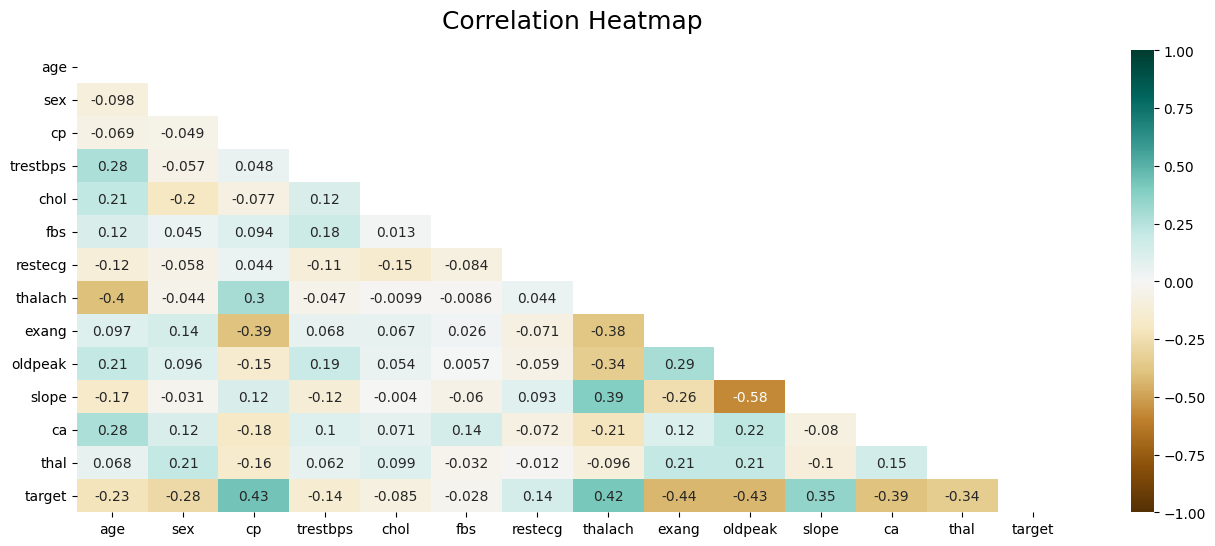

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

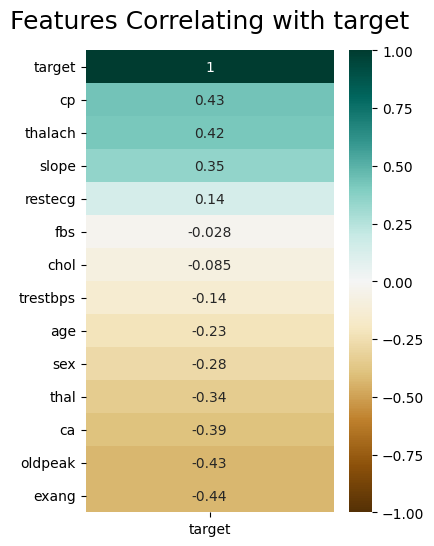

In [ ]:
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16)
plt.show()

In [9]:
print("How many duplicated rows do we have:",df.duplicated().sum())

How many duplicated rows do we have: 1


In [10]:
df_out=copy.deepcopy(df)

In [11]:
df_out.drop_duplicates(inplace=True)

In [12]:
df_out.reset_index(drop=True, inplace=True)

In [13]:
df_out.drop(['fbs'], axis=1, inplace=True)

In [14]:
print('cp:', df_out.cp.unique())
print('thal:', df_out.thal.unique())
print('sex:', df_out.sex.unique())
print('restecg:', df_out.restecg.unique())
print('slope:', df_out.slope.unique())
print('ca:', df_out.ca.unique())

cp: [3 2 1 0]
thal: [1 2 3 0]
sex: [1 0]
restecg: [0 1 2]
slope: [0 2 1]
ca: [0 2 1 3 4]


In [15]:
print(df_out.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [16]:
print(df_out.shape)

(302, 13)


In [17]:
df_out.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


In [18]:
from tqdm import tqdm



for i in tqdm(range(10000)):
    pass

100%|██████████| 10000/10000 [00:00<00:00, 2264253.94it/s]


In [19]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [20]:
df_final=copy.deepcopy(df_out)

In [21]:
# 1. Prepare the data
X=df_final.drop('target',axis=1).values
y=df_final['target'].values

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X_cols = X.columns
X = scaler.fit_transform(X)
# X = pd.DataFrame(X,columns=X_cols)

In [23]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=101,
                                                     shuffle=True, stratify=y
                                                    )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 12)
(61, 12)
(241,)
(61,)


In [24]:
print(X_train)

[[-1.26431513 -1.46486632  1.005911   ... -0.64583368 -0.71491124
  -0.51399432]
 [ 0.39626693 -1.46486632 -0.93520799 ... -0.64583368  1.27497996
  -2.1479552 ]
 [-1.48572607  0.68265615 -0.93520799 ...  0.97951442 -0.71491124
   1.11996657]
 ...
 [-1.3750206   0.68265615  0.0353515  ...  0.97951442 -0.71491124
  -0.51399432]
 [-1.3750206   0.68265615  1.005911   ... -2.27118179 -0.71491124
   1.11996657]
 [ 1.61402711  0.68265615  1.005911   ... -0.64583368  2.26992556
   1.11996657]]


In [ ]:
# print(X_test)

In [26]:
# 2. Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# train_data = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)

In [27]:
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)

### Initial Hidden layers 6 and 4

In [34]:
import torch.nn as nn

# Parametrlər
input_size = 12  # 13 azad göstərici - independent feature - X features
hidden_size_1 = 6  # ixtiyari gizli laydakı neyron sayı
hidden_size_2 = 4  # ixtiyari gizli laydakı neyron sayı
output_size = 1  # çıxış. ya yağır, ya yağmır

In [35]:
# neyron şəbəkəsini `nn.Sequential` ilə edirik
model = nn.Sequential(
    nn.Linear(input_size, hidden_size_1),  # İlk tam bağlı lay
    nn.ReLU(),  # Aktivasiya funksiyası lambda x: max(x, 0)
    nn.Linear(hidden_size_1, hidden_size_2),  # Gizli lay
    nn.ReLU(),  #
    nn.Linear(hidden_size_2, output_size),  # Çıxış layı
    nn.Sigmoid(),  # Sigmoid aktivasiya funksiyası)
)

In [36]:
# itki funksiyası
loss_function = nn.BCELoss() # binary cross entropy (default)
# optimallaşdırıcı - nə idi bu?? izah edin
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# dövrələrin sayı
epochs = 10

In [37]:
# Modelin təlimi
for epoch in tqdm(range(epochs)):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

100%|██████████| 10/10 [00:00<00:00, 131.14it/s]


In [38]:
# 4. proqnoz və dəyərləndirmə
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = (predictions > 0.5).int().numpy()

In [39]:
print("Dəqiqlik:", accuracy_score(y_test, predicted_classes))
print(classification_report(y_test, predicted_classes))

Dəqiqlik: 0.819672131147541
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### More epoch size and hidden layers

In [ ]:
# Parametrlər
input_size = 12  # 4 azad göstərici - independent feature - X features
hidden_size = 36  # ixtiyari gizli laydakı neyron sayı
output_size = 1  # çıxış. ya yağır, ya yağmır

# neyron şəbəkəsini `nn.Sequential` ilə təyin edirik
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),  # İlk tam bağlı lay
    nn.ReLU(),  # Aktivasiya funksiyası
    nn.Linear(hidden_size, hidden_size),  # Gizli lay
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),  # Gizli lay
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),  # Çıxış layı
    nn.Sigmoid()  # Sigmoid aktivasiya funksiyası
)

In [ ]:
# itki funksiyası
loss_function = nn.BCELoss() # binary cross entropy (default)
# optimallaşdırıcı - nə idi bu?? izah edin
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# dövrələrin sayı
epochs = 50

In [ ]:
# Modelin təlimi
for epoch in tqdm(range(epochs)):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()

100%|██████████| 50/50 [00:01<00:00, 36.28it/s]


In [ ]:
# 4. proqnoz və dəyərləndirmə
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = (predictions > 0.5).int().numpy()

In [ ]:
print("Dəqiqlik:", accuracy_score(y_test, predicted_classes))
print(classification_report(y_test, predicted_classes))

Dəqiqlik: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [83]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=101,
                                                     shuffle=True, stratify=y
                                                    )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 12)
(61, 12)
(241,)
(61,)


### Another Method PyTorch (Linear)

In [102]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=101,
                                                     shuffle=True, stratify=y
                                                    )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 12)
(61, 12)
(241,)
(61,)


In [156]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).long()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).long()

In [157]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()
        self.fc1 = nn.Linear(12, 6)
        self.fc2 = nn.Linear(6, 4)
        self.fc3 = nn.Linear(4, 2)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.dropout(x)
        return self.fc3(x)

In [158]:
net = HeartDiseaseNN()

In [159]:
import torch
from torch import nn, optim
from torch.nn import functional as F

In [160]:
optimizer = optim.AdamW(net.parameters())
criterion = nn.CrossEntropyLoss()

In [161]:
losses = []

In [162]:
max_test = 0
best_params = net.state_dict()
for epoch in range(1, 50):
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    _, y_pred = torch.max(outputs, 1)
    train_acc = accuracy_score(y_train_tensor, y_pred)

    pred_test = net(X_test_tensor)
    _, y_test_pred = torch.max(pred_test, 1)
    test_acc = accuracy_score(y_test, y_test_pred)
    print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
                                                                      train_acc*100, test_acc * 100))
    if test_acc > max_test:
        max_test = test_acc
        best_params = net.state_dict()
net.load_state_dict(best_params)

Epoch 1, Loss: 0.7079002857208252, Acc:53.94%, Test Acc: 55.74%
Epoch 2, Loss: 0.706610918045044, Acc:53.94%, Test Acc: 55.74%
Epoch 3, Loss: 0.7028922438621521, Acc:53.94%, Test Acc: 55.74%
Epoch 4, Loss: 0.705076277256012, Acc:53.94%, Test Acc: 55.74%
Epoch 5, Loss: 0.7025206685066223, Acc:54.36%, Test Acc: 55.74%
Epoch 6, Loss: 0.7004502415657043, Acc:53.53%, Test Acc: 54.10%
Epoch 7, Loss: 0.6991307139396667, Acc:54.77%, Test Acc: 55.74%
Epoch 8, Loss: 0.6999508738517761, Acc:54.36%, Test Acc: 55.74%
Epoch 9, Loss: 0.6967247128486633, Acc:53.94%, Test Acc: 54.10%
Epoch 10, Loss: 0.6962825655937195, Acc:53.94%, Test Acc: 54.10%
Epoch 11, Loss: 0.693592369556427, Acc:53.94%, Test Acc: 55.74%
Epoch 12, Loss: 0.6900902986526489, Acc:54.36%, Test Acc: 54.10%
Epoch 13, Loss: 0.6909340620040894, Acc:55.60%, Test Acc: 54.10%
Epoch 14, Loss: 0.6920605301856995, Acc:55.19%, Test Acc: 54.10%
Epoch 15, Loss: 0.690486490726471, Acc:54.36%, Test Acc: 54.10%
Epoch 16, Loss: 0.6863369345664978, Ac

<All keys matched successfully>

In [163]:
pred_test = net(X_test_tensor)
_, y_pred = torch.max(pred_test, 1)

In [164]:
accuracy_score(y_test_tensor, y_pred)

0.5409836065573771

In [165]:
print(classification_report(y_test_tensor, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.18      0.26        28
           1       0.55      0.85      0.67        33

    accuracy                           0.54        61
   macro avg       0.52      0.51      0.46        61
weighted avg       0.53      0.54      0.48        61

